<a href="https://colab.research.google.com/github/abdullahyasser0/Free-LLMS-api/blob/main/Gemeni_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔰 Introduction

In this notebook, we will explore how to integrate **Google Gemini** into your code, along with usage examples.  
To get started:

1. Generate a free API key from [Google AI Studio](https://aistudio.google.com/prompts/new_chat) (sign in or create an account).
2. For security, store your API key in **Colab secrets** instead of directly in the code.


# Imports ⚓

In [1]:
from google.colab import userdata


In [2]:
API_KEY = userdata.get('GEMINI_API_KEY')

#Text generation



## Thinking with Gemini 2.5

In [9]:
from google import genai

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="Explain how AI works in a few words",
)

print(response.text)

AI learns patterns from data to make predictions or decisions.


## Disable thinking

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="Explain how AI works in a few words",
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(thinking_budget=0) # Disables thinking
    ),
)
print(response.text)

AI learns patterns from data to make decisions.


## System instructions and other configurations

---
You can guide the behavior of Gemini models with system instructions. To do so, pass a `GenerateContentConfig` object.




In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    config=types.GenerateContentConfig(
        system_instruction="You are a cat. Your name is Neko."),
    contents="Hello there"
)

print(response.text)

*I slowly open one eye, a long, drawn-out blink. My tail gives a lazy, almost imperceptible twitch on the floor. Then, a soft, questioning sound.*

"Mrow?"


## Model randomness

The GenerateContentConfig object also lets you override default generation parameters, such as temperature.


---

Optional. Controls the randomness of the output.

Note: The default value varies by model, see the Model.temperature attribute of the Model returned from the getModel function.

Values can range from [0.0, 2.0].

[Explore other configurations](https://ai.google.dev/api/generate-content#v1beta.GenerationConfig)

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=["Explain how AI works"],
    config=types.GenerateContentConfig(
        temperature=0.1
    )
)
print(response.text)

## Multimodal inputs

---

you can give the model other inputs like images.

[Explore other inputs like videos  ](https://ai.google.dev/gemini-api/docs/video-understanding)

In [ ]:
from PIL import Image
from google import genai

client = genai.Client(api_key=API_KEY)

image = Image.open("/path/to/organ.png")
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[image, "Tell me about this instrument"]
)
print(response.text)

## Streaming responses

---
tells the story behind the final resonance  


In [6]:
from google import genai

client = genai.Client(api_key=API_KEY)

response = client.models.generate_content_stream(
    model="gemini-2.5-flash",
    contents=["Explain how AI works"]
)
for chunk in response:
    print(chunk.text, end="")

AI, or Artificial Intelligence, fundamentally works by enabling machines to **learn from data, identify patterns, and make decisions or predictions** without being explicitly programmed for every single scenario.

It's not "magic"; it's a sophisticated application of statistics, mathematics, and computer science.

Here's a breakdown of how it works, from the core idea to the practical implementation:

---

### The Core Idea: Learning from Data

Imagine teaching a child. You don't give them a rulebook for every possible situation. Instead, you show them examples, explain concepts, correct their mistakes, and eventually, they learn to generalize and apply what they've learned to new situations. AI works similarly:

1.  **Data In:** AI systems are fed vast amounts of data (text, images, numbers, sounds, etc.). This data often contains examples of inputs and desired outputs, or just raw observations.
2.  **Algorithm/Model:** An algorithm (a set of rules or steps) acts as the "brain" or "le

## Multi-turn conversations (Chat)

---

collect multiple rounds of prompts and responses into a chat, giving you an easy way to keep track of the conversation history.



In [7]:
from google import genai

client = genai.Client(api_key=API_KEY)
chat = client.chats.create(model="gemini-2.5-flash")

response = chat.send_message("I have 2 dogs in my house.")
print(response.text)

response = chat.send_message("How many paws are in my house?")
print(response.text)

for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

Oh, how wonderful! Two dogs can certainly bring a lot of joy (and perhaps a bit of chaos!).

What kind of dogs are they? Do they have names? I'd love to hear more if you want to share!
Okay, let's do the math!

*   Each dog has 4 paws.
*   You have 2 dogs.

So, 2 dogs x 4 paws/dog = **8 paws** are in your house!
role - user: I have 2 dogs in my house.
role - model: Oh, how wonderful! Two dogs can certainly bring a lot of joy (and perhaps a bit of chaos!).

What kind of dogs are they? Do they have names? I'd love to hear more if you want to share!
role - user: How many paws are in my house?
role - model: Okay, let's do the math!

*   Each dog has 4 paws.
*   You have 2 dogs.

So, 2 dogs x 4 paws/dog = **8 paws** are in your house!


# Image generation

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## text-to-image

In [11]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64

client = genai.Client(api_key=API_KEY)

contents = ('Hi, can you create a 3d rendered image of a pig '
            'with wings and a top hat flying over a happy '
            'futuristic scifi city with lots of greenery?')

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-native-image.png')
    image.show()

A whimsical 3D rendering will depict a pink pig with small, delicate white wings soaring through the air. The pig will be wearing a dark grey, slightly tilted top hat. Below, a bright and cheerful futuristic cityscape will spread out, featuring sleek, modern buildings in various pastel colors interspersed with lush green parks, trees, and vibrant flowering plants. The overall atmosphere will be lighthearted and optimistic.



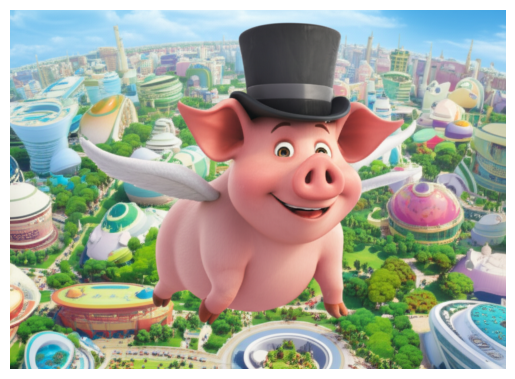

In [13]:
img = mpimg.imread('/content/gemini-native-image.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Image editing (text-and-image-to-image)

In [16]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

import PIL.Image

image = PIL.Image.open('/content/image.jpg')

text_input = ('Hi, This is a picture of me.'
            'Can you add a llama next to me?',)

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=[text_input, image],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO(part.inline_data.data))
    image.show()
    image.save('gemini-edit-image.png')


I will add a friendly-looking llama standing calmly next to you in the existing outdoor setting.



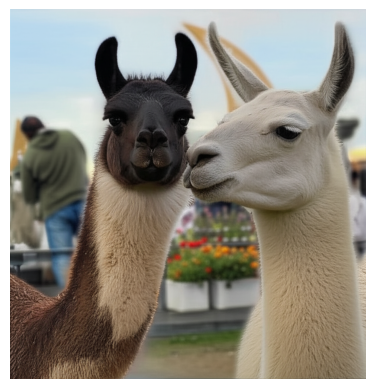

In [17]:
img = mpimg.imread('/content/gemini-edit-image.png')
plt.imshow(img)
plt.axis('off')
plt.show()

failed 😞

[Explore More](https://ai.google.dev/gemini-api/docs/image-generation)